## Basic Machine Learning Demo: Yahoo Finance and Hockey 
### Contents 
* Stock Market Prediction
* Stanley Cup Winner Prediction

*Complete project description can be found in README.md*

### Stock Market Prediction
In the first section of my demo, we will make a predictive model of the future of a stock ticker. For the sake of example I chose GOOG, but any alternative stock ticker can be used as well. We will use the python libraries yfinance, pandas, scikit-learn, and matplotlib to predict and visualize the data.

The first block instantiates data using stock information from the yahoo finance database.

In [23]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Download historical stock data (within the year 2022)
ticker = 'GOOG'
data = yf.download(ticker, start='2022-01-01', end='2023-01-01')
data.head()

C:\Users\ben\AppData\Local\Temp\ipykernel_13736\2394650224.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2022-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2022-01-03,144.217239,144.689939,142.654537,143.621780,25214000
2022-01-04,143.563141,145.743676,142.966331,144.690443,22928000
2022-01-05,136.840103,143.445341,136.710866,143.329028,49642000
2022-01-06,136.738205,138.860599,135.955367,136.685024,29050000
2022-01-07,136.194931,137.437787,134.986614,137.090107,19408000


The next cell cleans and splits the data using python slicing methods and the scikit-learn train_test_split() method. The split values are then printed to check for accurracy. 

In [24]:
# Clean the data
features = data[['Close']].shift(1).dropna()
labels = data['Close'][1:]

# Break data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features.values.reshape(-1, 1), labels.values, test_size=0.2, random_state=42)

# Ensure the data is split correctly
print(f"Training set size: {len(x_train)}")
print(f"Testing set size: {len(x_test)}")

Training set size: 200
Testing set size: 50


The next step is to set up and train a linear regression model based on the train / test splits. We also use the scikit mse method to evaluate the effectiveness of the model.

In [25]:
# Set up and train Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict and evaluate error
predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 5.97


Finally, we plot the tested vs actual results on a matplotlib plot to visualize the error.

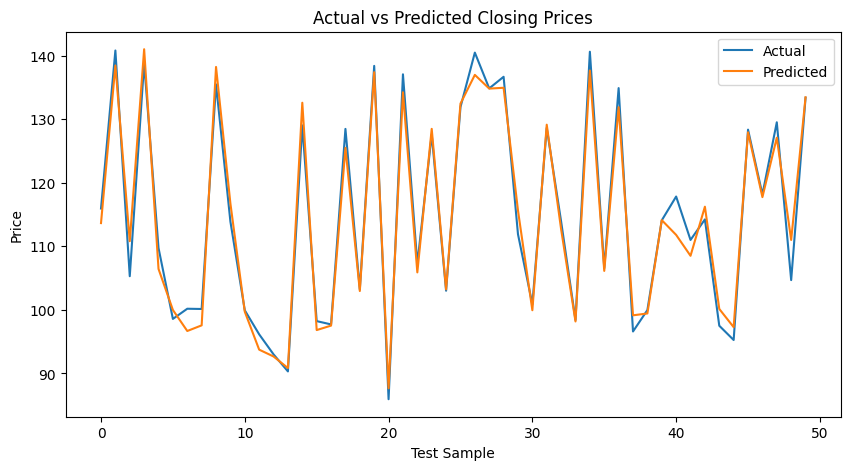

In [26]:
# Plot the results
plt.figure(figsize=(10,5))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Test Sample')
plt.ylabel('Price')
plt.legend()
plt.show()

### Stanley Cup Winner Prediction


Next we will use a random forrest classifier model to predict the winner of the 2025 stanley cup using data from the 2000-2024 seasons. At the time of making this the season has already ended with the Florida Panthers as cup champions so we will be able to evaluate how accurate the model is. Check out my other project "txt to csv for hockey predictions" to see how I created the csv files from data on the nhl website. My personal prediction before starting this part of the project is that the model will do fairly well but fail due to statistical outliers that do really well in the regular season but always choke in the playoffs (looking at you Winnipeg).

In [27]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Note: not all teams have data for every season and some teams have had name changes
# For the sake of this project, we will always be calling teams like the "Atlanta Thrashers" the "Winnipeg Jets"
teams = ['Anaheim Ducks', 'Arizona Coyotes', 'Boston Bruins', 'Buffalo Sabres',
         'Calgary Flames', 'Carolina Hurricanes', 'Chicago Blackhawks','Colorado Avalanche','Columbus Blue Jackets',
         'Dallas Stars', 'Detroit Red Wings', 'Edmonton Oilers', 'Florida Panthers',
         'Los Angeles Kings', 'Minnesota Wild', 'Montreal Canadiens', 'Nashville Predators','New Jersey Devils',
         'New York Islanders', 'New York Rangers', 'Ottawa Senators', 'Philadelphia Flyers','Pittsburgh Penguins',
         'San Jose Sharks', 'Seattle Kraken', 'St. Louis Blues', 'Tampa Bay Lightning',
         'Toronto Maple Leafs', 'Vancouver Canucks', 'Vegas Golden Knights', 'Washington Capitals','Winnipeg Jets'] 
seasons = list(range(2000, 2005)) # Season list is a little wacky due to the 2005 lockout
seasons.append(2024) 

stats = []
winners = []
for season in seasons:
    csv = pd.read_csv(f'./CSV/{season}.csv')

    for team in teams:
        team_stats = csv[csv['Team'] == team]

        # Not all teams existed in every season since 2000
        if not team_stats.empty:

            stats.append([
                season,
                team,
                team_stats['Wins'].iloc[0],
                team_stats['Points'].iloc[0],
                team_stats['P%'].iloc[0],
                team_stats['RW'].iloc[0],
                team_stats['ROW'].iloc[0],
                team_stats['S/OW'].iloc[0],
                team_stats['GF'].iloc[0],
                team_stats['GA'].iloc[0],
                team_stats['GF/GP'].iloc[0],
                team_stats['GA/GP'].iloc[0],
                team_stats['PP%'].iloc[0],
                team_stats['PK%'].iloc[0],
                team_stats['NetPP%'].iloc[0],
                team_stats['NetPK%'].iloc[0],
                team_stats['Shots/GP'].iloc[0],
                team_stats['SA/GP'].iloc[0],
                team_stats['FOW%'].iloc[0]
            ])

    winners.append([season, team_stats['Winner'].iloc[0]])

stats_df = pd.DataFrame(stats, columns=['Season', 'Team', 'Wins', 'Points', 'P%', 'RW', 'ROW', 'S/OW', 'GF', 'GA', 'GF/GP', 'GA/GP', 'PP%', 'PK%', 'NetPP%', 'NetPK%', 'Shots/GP', 'SA/GP', 'FOW%'])
winners_df = pd.DataFrame(winners, columns=['Season', 'Winner'])

data = stats_df.merge(winners_df, on='Season')

data['IsWinner'] = (data['Team'] == data['Winner']).astype(int)
data.head()

,Season,Team,Wins,Points,P%,RW,ROW,S/OW,GF,GA,...,GA/GP,PP%,PK%,NetPP%,NetPK%,Shots/GP,SA/GP,FOW%,Winner,IsWinner
0,2000,Anaheim Ducks,34,83,0.506,31,34,0,217,227,...,2.77,16.6,79.1,14.2,80.4,28.7,27.5,49.1,New Jersey Devils,0
1,2000,Arizona Coyotes,39,90,0.549,35,39,0,232,228,...,2.78,11.9,86.0,9.7,90.5,27.0,28.5,50.4,New Jersey Devils,0
2,2000,Boston Bruins,24,73,0.445,23,24,0,210,248,...,3.02,14.4,79.5,13.2,79.5,30.7,27.7,49.0,New Jersey Devils,0
3,2000,Buffalo Sabres,35,85,0.518,30,35,0,213,204,...,2.49,10.5,85.0,7.7,87.3,27.2,26.9,47.0,New Jersey Devils,0
4,2000,Calgary Flames,31,77,0.470,20,31,0,211,256,...,3.12,17.9,79.7,15.5,80.8,30.1,29.0,49.2,New Jersey Devils,0


In [28]:
le_team = LabelEncoder()
data['Team_encoded'] = le_team.fit_transform(data['Team'])

X = data[['Team_encoded', 'Wins', 'Points', 'P%', 'RW', 'ROW', 'S/OW', 'GF', 'GA', 'GF/GP', 'GA/GP', 'PP%', 'PK%', 'NetPP%', 'NetPK%', 'Shots/GP', 'SA/GP', 'FOW%']]
y = data['IsWinner']

# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
# Read 2025 stats
stats_2025 = []
csv = pd.read_csv('./CSV/2025.csv')
for team in teams:
    team_stats_2025 = csv[csv['Team'] == team]

    stats_2025.append([
        season,
        team,
        team_stats_2025['Wins'].iloc[0],
        team_stats_2025['Points'].iloc[0],
        team_stats_2025['P%'].iloc[0],
        team_stats_2025['RW'].iloc[0],
        team_stats_2025['ROW'].iloc[0],
        team_stats_2025['S/OW'].iloc[0],
        team_stats_2025['GF'].iloc[0],
        team_stats_2025['GA'].iloc[0],
        team_stats_2025['GF/GP'].iloc[0],
        team_stats_2025['GA/GP'].iloc[0],
        team_stats_2025['PP%'].iloc[0],
        team_stats_2025['PK%'].iloc[0],
        team_stats_2025['NetPP%'].iloc[0],
        team_stats_2025['NetPK%'].iloc[0],
        team_stats_2025['Shots/GP'].iloc[0],
        team_stats_2025['SA/GP'].iloc[0],
        team_stats_2025['FOW%'].iloc[0]
    ])
team_stats_2025 = pd.DataFrame(stats_2025, columns=['Season', 'Team', 'Wins', 'Points', 'P%', 'RW', 'ROW', 'S/OW', 'GF', 'GA', 'GF/GP', 'GA/GP', 'PP%', 'PK%', 'NetPP%', 'NetPK%', 'Shots/GP', 'SA/GP', 'FOW%'])
team_stats_2025['Team_encoded'] = le_team.transform(team_stats_2025['Team'])
X_2025 = team_stats_2025[['Team_encoded', 'Wins', 'Points', 'P%', 'RW', 'ROW', 'S/OW', 'GF', 'GA', 'GF/GP', 'GA/GP', 'PP%', 'PK%', 'NetPP%', 'NetPK%', 'Shots/GP', 'SA/GP', 'FOW%']]

# Get probabilities and format
probs = clf.predict_proba(X_2025)[:, 1]
team_stats_2025['Win_Probability'] = probs

predicted_winner = team_stats_2025.loc[team_stats_2025['Win_Probability'].idxmax(), 'Team']
print(f'Predicted 2025 Stanley Cup Winner: {predicted_winner}')
team_stats_2025.sort_values('Win_Probability', ascending=False).head()

Predicted 2025 Stanley Cup Winner: Winnipeg Jets


,Season,Team,Wins,Points,P%,RW,ROW,S/OW,GF,GA,...,GA/GP,PP%,PK%,NetPP%,NetPK%,Shots/GP,SA/GP,FOW%,Team_encoded,Win_Probability
31,2024,Winnipeg Jets,56,116,0.707,43,54,2,275,190,...,2.32,28.9,79.4,27.1,81.4,28.2,27.2,49.3,31,0.56
13,2024,Los Angeles Kings,48,105,0.640,43,47,1,249,203,...,2.48,17.9,81.4,15.0,83.1,28.1,25.5,50.6,13,0.18
5,2024,Carolina Hurricanes,47,99,0.604,42,47,0,266,230,...,2.80,18.7,83.6,16.7,87.7,31.7,24.9,52.7,5,0.14
30,2024,Washington Capitals,51,111,0.677,43,49,2,286,229,...,2.79,23.5,82.0,20.4,85.4,27.6,27.2,50.2,30,0.12
27,2024,Toronto Maple Leafs,52,108,0.659,40,51,1,267,229,...,2.79,24.8,77.9,21.6,80.4,28.0,29.3,53.7,27,0.11


In the end, the learning model was not able to correctly predict the 2025 Stanley Cup champion. The real life champion Florida Panthers weren't even in the top 5 most likely teams according to my model. My best explanation is that sports have random events and upsets that are unpredictable, also the power of teams can change with trades and that the Winnipeg Jets always choke in the biggest moments but that might just be a cope because my model was incorrect. Overall, this was still a valuable project that I had fun with since it dealt with a passtime that I love. I certainly learned a lot that I can use in the future. Maybe I'll use the stock market model to make my trades for me because that one actually wasn't very far from accurate. Thanks for viewing this demo I hope it was interesting for you.